In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import gensim
from gensim import corpora
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
path = "C:/Users/HP/Desktop/corpuses/latest.csv"


In [92]:
print(stop_words)

{'until', 'most', 'if', 'some', 'wouldn', 'of', "it's", 'themselves', 'too', 'she', 'those', 'be', 'them', 'there', 'we', "you're", 'up', 'hers', 'couldn', 'ours', "shan't", 'but', 'you', 'here', 'theirs', 'with', 'wasn', 'should', 'll', 'o', 't', 'just', 'ourselves', 'are', 'so', "aren't", 'while', "haven't", 'd', 'hadn', 'mightn', 'only', 'doing', 's', 'again', 'yourself', 'yourselves', 'a', 'himself', "that'll", 'his', 'will', 'below', "didn't", 'very', 'shan', 'herself', 'how', 'between', 'ain', "you'd", 'isn', 'he', 'him', 'both', 'were', 'after', "hasn't", 'above', "isn't", 'from', 'not', 'then', 'because', 'me', 'or', 'when', 'own', 'during', 'itself', "should've", 'an', 'further', 'their', 'which', 'that', 'each', 'aren', 'our', 'the', 'other', 'what', 'been', "weren't", 'this', 'didn', 'at', 'do', 'such', 'was', 'into', 'why', 'where', "you'll", 'through', 'to', 'and', 'my', 're', 'hasn', 'whom', 'ma', 'than', 'any', 'your', 'all', 'does', 'shouldn', 'y', 'about', 'few', 'does

In [8]:
news_articles = pd.read_csv(path)
news_articles.head()

,Article_id,Title,Content,url
0,0,"TVs, Tablets And Phones: How To Manage 'Screen...",In today’s media-rich world (or media-saturate...,https://www.ibtimes.com/tvs-tablets-phones-how...
1,1,Firefighters Warn Hand Sanitizers Left Inside ...,KEY POINTS Fire fighters warn that hand saniti...,https://www.ibtimes.com/firefighters-warn-hand...
2,2,Hand Sanitizers: Do They Go Out Of Date?,KEY POINTS Coronavirus confirmed cases around ...,https://www.ibtimes.com/hand-sanitizers-do-the...
3,3,Coronavirus Update: SpaceX Is Creating Hand Sa...,KEY POINTS SpaceX is making face shields and h...,https://www.ibtimes.com/coronavirus-update-spa...
4,4,Trump Says US Won't Close If Hit By Coronaviru...,KEY POINTS Trump will not shut down America ag...,https://www.ibtimes.com/trump-says-us-wont-clo...


In [99]:

news_articles = news_articles[['Article_id','Title','Content']].dropna()
 
articles = news_articles['Content'].tolist()
articles[0] 

'In today’s media-rich world (or media-saturated, depending on your view), one rarely has to look far to find parents concerned about the ways that kids engage with technology. Recently, managing “screen time” seems to be on everyone’s mind – particularly during these summer months when kids find themselves with more time on their hands.\n\nAs someone who has spent the majority of my career studying kids and safety online, I get a lot of questions from parents about screen time. My response? There’s a lot more to digital media consumption than expert advice about hourly limits.\n\nWhere ‘screen time’ comes from\n\nThe idea of “screen time” initially gained traction in 1999, when the American Academy of Pediatrics suggested that parents avoid smartphone, tablet, computer and TV use for children under two and limit such use to no more than two hours for children over two, adding hours as kids mature. While the American Academy of Pediatrics relaxed these guidelines somewhat in 2016 (expa

In [106]:
def clean_tokenize(document):
    document = re.sub('[^\w_\s-]', ' ',document)
    
    tokens = nltk.word_tokenize(document) 
    stop_removed =  [w for w in tokens if not w in stop_words]

    
    
    cleaned_article =  [lemmatizer.lemmatize(item).lower() for item in stop_removed]
    #cleaned_article = [stemmer.stem(item).lower() for item in stop_removed]) 
    return cleaned_article
    
    


# In the above snippet I have used lemmatizer instead of stemmer. Lemmatizer seems to be more powerful than stemmer. To see the difference hash lemmatizer code and unhash stemmer code and run the code.

In [107]:
cleaned_articles = list(map(clean_tokenize, articles))
 
cleaned_articles[0]


['in',
 'today',
 'media-rich',
 'world',
 'media-saturated',
 'depending',
 'view',
 'one',
 'rarely',
 'look',
 'far',
 'find',
 'parent',
 'concerned',
 'way',
 'kid',
 'engage',
 'technology',
 'recently',
 'managing',
 'screen',
 'time',
 'seems',
 'everyone',
 'mind',
 'particularly',
 'summer',
 'month',
 'kid',
 'find',
 'time',
 'hand',
 'as',
 'someone',
 'spent',
 'majority',
 'career',
 'studying',
 'kid',
 'safety',
 'online',
 'i',
 'get',
 'lot',
 'question',
 'parent',
 'screen',
 'time',
 'my',
 'response',
 'there',
 'lot',
 'digital',
 'medium',
 'consumption',
 'expert',
 'advice',
 'hourly',
 'limit',
 'where',
 'screen',
 'time',
 'come',
 'the',
 'idea',
 'screen',
 'time',
 'initially',
 'gained',
 'traction',
 '1999',
 'american',
 'academy',
 'pediatrics',
 'suggested',
 'parent',
 'avoid',
 'smartphone',
 'tablet',
 'computer',
 'tv',
 'use',
 'child',
 'two',
 'limit',
 'use',
 'two',
 'hour',
 'child',
 'two',
 'adding',
 'hour',
 'kid',
 'mature',
 'while'

# Parts of Speech Tagging. I do not think we would require this for our assignment. I have added the code here anyway. We will use it when required.Some nlp processes like chunking requires tagging. But we do not need that either as of now.



In [27]:
# parts of speech taging(it is not used any where!)
def postag(document):
    tokens = nltk.word_tokenize(document)
    tag = nltk.pos_tag(tokens)
    return tag
tags = list(map(postag,articles)) 
tags[0]


[('In', 'IN'),
 ('today', 'NN'),
 ('’', 'NNP'),
 ('s', 'VBD'),
 ('media-rich', 'JJ'),
 ('world', 'NN'),
 ('(', '('),
 ('or', 'CC'),
 ('media-saturated', 'VBN'),
 (',', ','),
 ('depending', 'VBG'),
 ('on', 'IN'),
 ('your', 'PRP$'),
 ('view', 'NN'),
 (')', ')'),
 (',', ','),
 ('one', 'CD'),
 ('rarely', 'RB'),
 ('has', 'VBZ'),
 ('to', 'TO'),
 ('look', 'VB'),
 ('far', 'RB'),
 ('to', 'TO'),
 ('find', 'VB'),
 ('parents', 'NNS'),
 ('concerned', 'VBN'),
 ('about', 'IN'),
 ('the', 'DT'),
 ('ways', 'NNS'),
 ('that', 'WDT'),
 ('kids', 'NNS'),
 ('engage', 'VBP'),
 ('with', 'IN'),
 ('technology', 'NN'),
 ('.', '.'),
 ('Recently', 'RB'),
 (',', ','),
 ('managing', 'VBG'),
 ('“', 'JJ'),
 ('screen', 'JJ'),
 ('time', 'NN'),
 ('”', 'NN'),
 ('seems', 'VBZ'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('on', 'IN'),
 ('everyone', 'NN'),
 ('’', 'JJ'),
 ('s', 'NN'),
 ('mind', 'NN'),
 ('–', 'VBD'),
 ('particularly', 'RB'),
 ('during', 'IN'),
 ('these', 'DT'),
 ('summer', 'NN'),
 ('months', 'NNS'),
 ('when', 'WRB'),
 ('ki

In [59]:
dictionary = corpora.Dictionary(cleaned_articles)

In [62]:
dictionary.doc2bow(cleaned_articles[0])

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 1),
 (5, 2),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 3),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 2),
 (14, 2),
 (15, 2),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 2),
 (21, 3),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 2),
 (34, 1),
 (35, 8),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 3),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 3),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 2),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 4),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 2),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 2),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 5),
 (81, 3),
 (82, 1),
 (83, 2),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 2),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 2),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),

In [63]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleaned_articles]

# Doc_term_matrix will be our input for LDA. In the snippets below I have copied the code for lda from the assignments to make sure that the doc_term_matrix can be used on LDA .

# We will write our code for LDA once we learn all the parameters for LDA.




In [64]:
Lda = gensim.models.ldamodel.LdaModel

In [84]:
ldamodel = Lda(doc_term_matrix, num_topics=9, id2word = dictionary, passes=50)

In [66]:
for i in ldamodel.print_topics(num_topics=3, num_words=10):
    print(i)


(1, '0.012*"the" + 0.010*"said" + 0.005*"new" + 0.004*"also" + 0.004*"people" + 0.004*"coronavirus" + 0.004*"country" + 0.003*"trump" + 0.003*"u" + 0.003*"would"')
(0, '0.012*"i" + 0.011*"the" + 0.005*"one" + 0.004*"it" + 0.004*"time" + 0.004*"like" + 0.004*"film" + 0.003*"year" + 0.003*"also" + 0.003*"world"')
(3, '0.017*"the" + 0.015*"said" + 0.009*"mr" + 0.006*"government" + 0.006*"minister" + 0.006*"would" + 0.005*"police" + 0.005*"state" + 0.004*"also" + 0.003*"people"')


In [85]:
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))


Perplexity:  -8.677280347906612


In [86]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel, texts= cleaned_articles, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.44326362879325937


In [81]:
def compute_coherence_values(dictionary, doc_term_matrix, cleaned_articles, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=cleaned_articles, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [82]:
def plot_graph(cleaned_articles,start, stop, step):
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,cleaned_articles,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

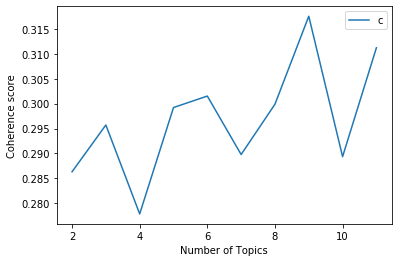

In [83]:
start,stop,step=2,12,1
plot_graph(cleaned_articles,start,stop,step)